In [34]:
import pandas as pd
import matplotlib.pyplot as plt


In [35]:
real_df = pd.read_csv('../data/real_data.csv', index_col=0)
real_df.drop(['Value', 'Log Value'], inplace=True, axis=1)
real_df.rename(columns={'Scaled Value': 'Value'}, inplace=True)
real_df.index = pd.to_datetime(real_df.index, utc=True)
real_df

,Value,Moving Std,Moving Momentum,Regime,Color
Timestamp,,,,,
2007-01-03 23:45:00+00:00,4700.598978,1114.733391,-1.558889,0.0,b
2007-01-04 00:00:00+00:00,4555.664883,1113.600647,-2.537720,0.0,b
2007-01-04 00:15:00+00:00,4349.762656,1111.906324,-3.739436,0.0,b
2007-01-04 00:30:00+00:00,4346.756464,1109.709744,-4.394472,0.0,b
2007-01-04 00:45:00+00:00,4447.696459,1106.800483,-4.227398,0.0,b
...,...,...,...,...,...
2019-04-30 22:45:00+00:00,1184.442891,852.687300,0.652124,1.0,r
2019-04-30 23:00:00+00:00,1158.571882,852.306562,0.554796,1.0,r
2019-04-30 23:15:00+00:00,1159.896285,851.928142,0.565118,1.0,r


In [36]:
generated_df = pd.read_csv('../data/generated_data.csv', index_col=0)
generated_df.drop(['Moving Avg'], inplace=True, axis=1)
generated_df.index.rename('Timestamp', inplace=True)
generated_df.index = pd.to_datetime(generated_df.index, utc=True)
generated_df

,Value,Moving Std,Moving Momentum,Regime,Color
Timestamp,,,,,
2050-01-06 23:30:00+00:00,1471.780138,1126.325547,4.905033,0.0,b
2050-01-06 23:45:00+00:00,1440.407796,1120.163486,4.771322,0.0,b
2050-01-07 00:00:00+00:00,1335.738976,1114.260111,4.231713,0.0,b
2050-01-07 00:15:00+00:00,1394.539376,1108.485332,4.213839,0.0,b
2050-01-07 00:30:00+00:00,1446.397344,1102.948650,4.230479,0.0,b
...,...,...,...,...,...
2061-12-28 23:00:00+00:00,1494.844293,626.986685,4.904509,0.0,b
2061-12-28 23:15:00+00:00,1511.513292,626.487573,4.981397,0.0,b
2061-12-28 23:30:00+00:00,1498.124674,625.877933,4.918948,0.0,b


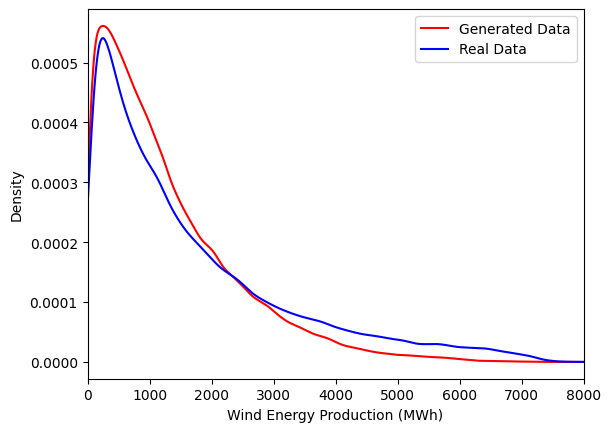

In [37]:
fig, ax = plt.subplots()

generated_df['Value'].plot(kind='kde', ax=ax, label='Generated Data', color='red')
real_df['Value'].plot(kind='kde', ax=ax, label='Real Data', color='blue')

plt.xlabel('Wind Energy Production (MWh)')
plt.ylabel('Density')
plt.xlim(0, 8000)
plt.legend()
plt.show()

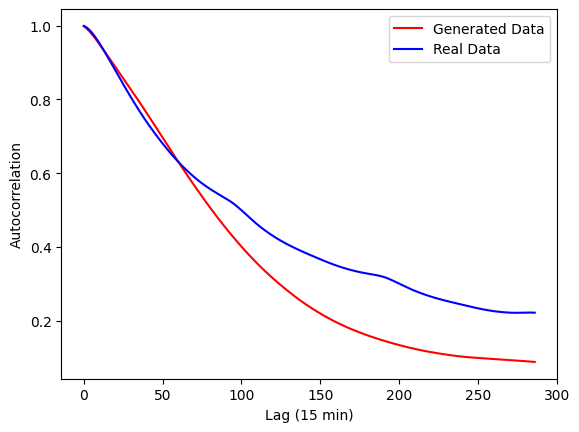

In [46]:
real_autocorr = []
generated_autocorr = []
for t in range(1, 3*96):
    real_autocorr.append(real_df['Value'].autocorr(lag=t))
    generated_autocorr.append(generated_df['Value'].autocorr(lag=t))

fig, ax = plt.subplots()
ax.plot(generated_autocorr, label='Generated Data', color='red')
ax.plot(real_autocorr, label='Real Data', color='blue')
plt.xlabel('Lag (15 min)')
plt.ylabel('Autocorrelation')
plt.legend()
plt.show()